# 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
from joblib import Parallel, delayed
import multiprocessing
import datetime
import statsmodels.api as sm
import seaborn
from sklearn.metrics import classification_report
import talib as ta
from collections import OrderedDict #保持Key的顺序
import time

from scipy import stats

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [174]:
Curr=pd.read_excel('C:/Users/Thinkpad/Desktop/选课.xlsx',index_col=0)

In [175]:
Curr_adj=Curr[[col for col in Curr.columns if col not in ['汉语','中国文化概论']]].copy()

In [176]:
def HeatMap(df):
    Curr=df.copy()
    Same_df=pd.DataFrame(columns=Curr.index,index=Curr.index)
    for inx in Curr.index:
        x=Curr.loc[inx,:]
        for iny in Curr.index:
            y=Curr.loc[iny,:]
            DIS=((x-y)**2).sum()**0.5
            Same_df.loc[inx,iny]=DIS

    for col in Same_df.columns:
        Same_df[col] = Same_df[col].astype(float)

    plt.figure(figsize=(20,18))
    seaborn.heatmap(Same_df,linewidths=0.05,linecolor='white',annot_kws={'size':8,'weight':'bold'},cmap='rainbow')
    plt.show()
    return Same_df

# 全科目相似度

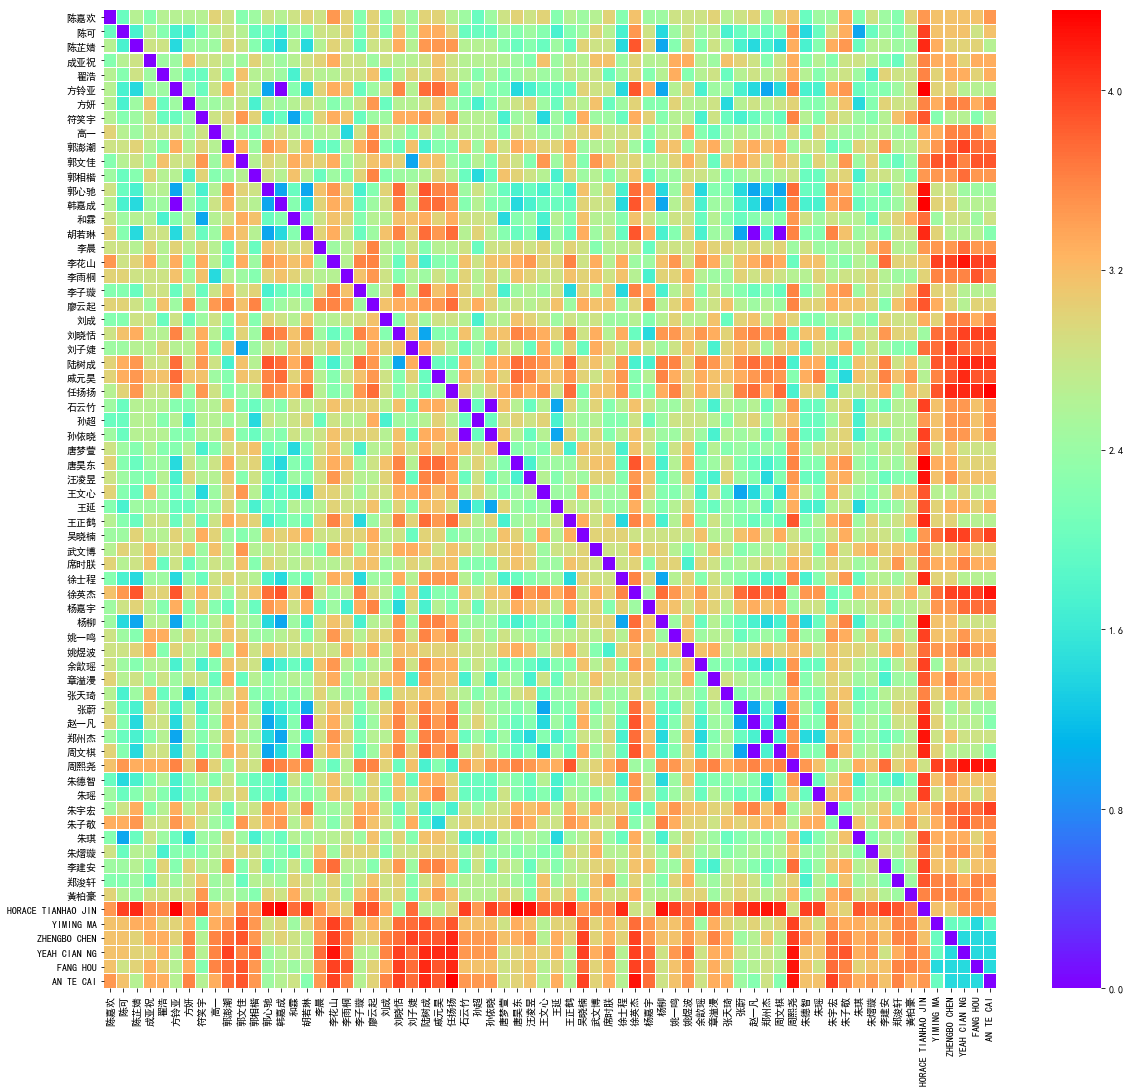

In [177]:
S0=HeatMap(Curr)

# 全科目相似度-去汉语课

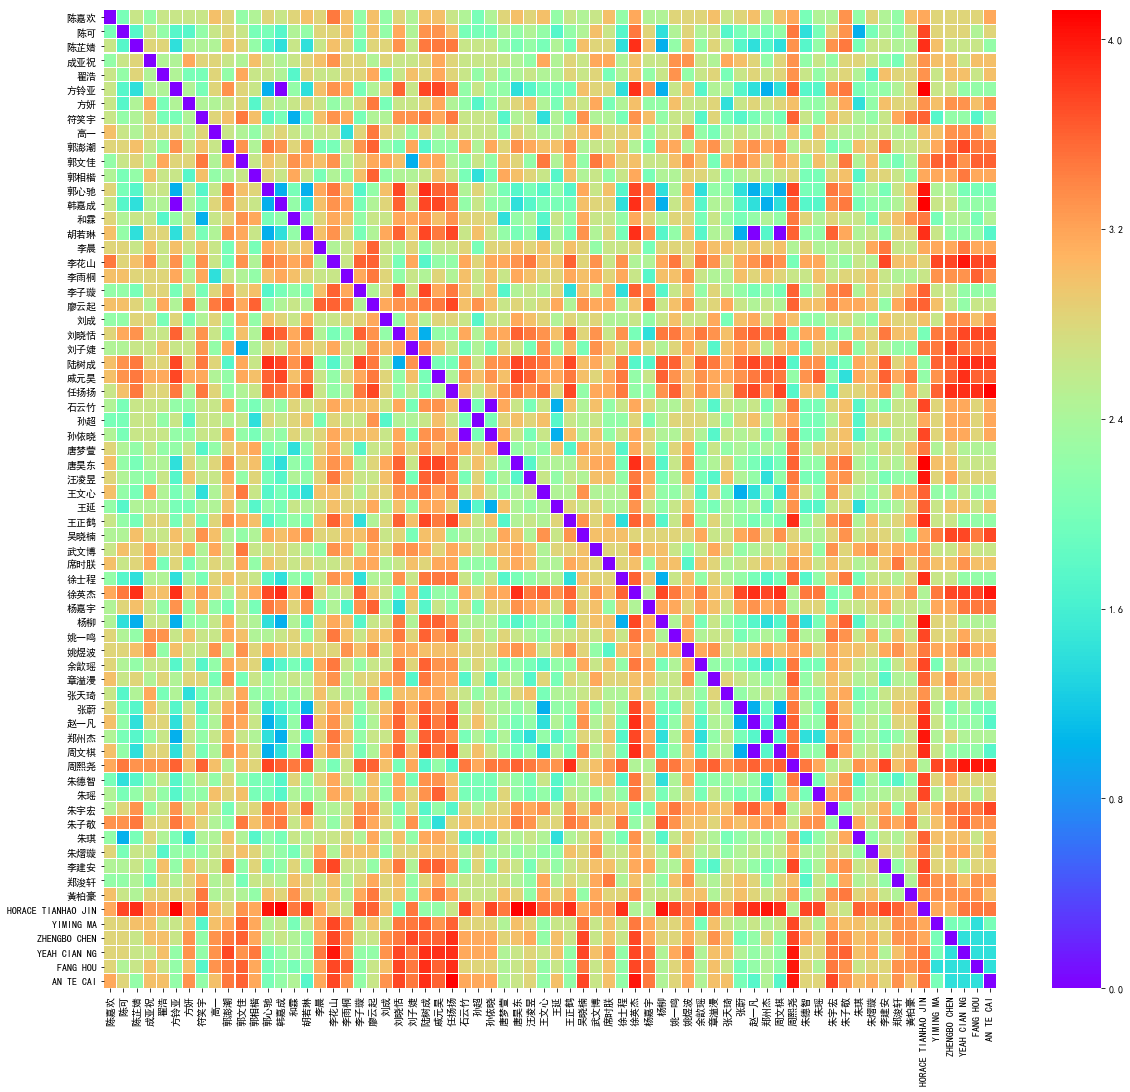

In [178]:
S1=HeatMap(Curr_adj)

# 与班级平均选课的距离

In [179]:
avg_vec=Curr_adj.mean()
Same_df=pd.DataFrame(columns=['平均距离'],index=Curr_adj.index)
for inx in Curr_adj.index:
    x=Curr_adj.loc[inx,:]
    DIS=((x-avg_vec)**2).sum()**0.5
    Same_df.loc[inx,'平均距离']=DIS
Same_df.sort_values('平均距离',ascending=False)

,平均距离
HORACE TIANHAO JIN,2.77805
周熙尧,2.55756
徐英杰,2.52864
戚元昊,2.42776
陆树成,2.42776
任扬扬,2.35395
李花山,2.31616
刘晓恬,2.29704
朱子敬,2.29063
廖云起,2.27129


# 课程被选数

In [180]:
Curr_adj.sum().sort_values().to_frame('被选数量')

,被选数量
商务英语沟通技巧,0
国际税收,2
另类投资,11
高级计量经济学,13
中国宏观经济分析,14
量化投资实践：策略和技术,23
金融风险管理,26
固定收益证券分析,27
中国公司法与证券法,29
证券投资风格与策略,30


# 个人选课数

In [181]:
Curr_adj.sum(axis=1).sort_values().to_frame('选课数量')

,选课数量
HORACE TIANHAO JIN,15
周熙尧,17
徐英杰,17
刘晓恬,17
朱宇宏,17
FANG HOU,17
ZHENGBO CHEN,17
YEAH CIAN NG,17
YIMING MA,17
郑浚轩,18


# 聚类后相似度热力图

In [182]:
Curr_adjList=Curr_adj.columns

In [183]:
def Cluster(df,N):
    Curr_adj=df.copy()
    clr=KMeans(n_clusters=N,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=0.0001,
           precompute_distances='auto',
           verbose=0,
           random_state=None,
           copy_x=True,
           n_jobs=None,
           algorithm='auto')
    Curr_adj['type']=clr.fit(Curr_adj).labels_
    Curr_adj_=Curr_adj.sort_values('type')
    return Curr_adj_

## 聚2类

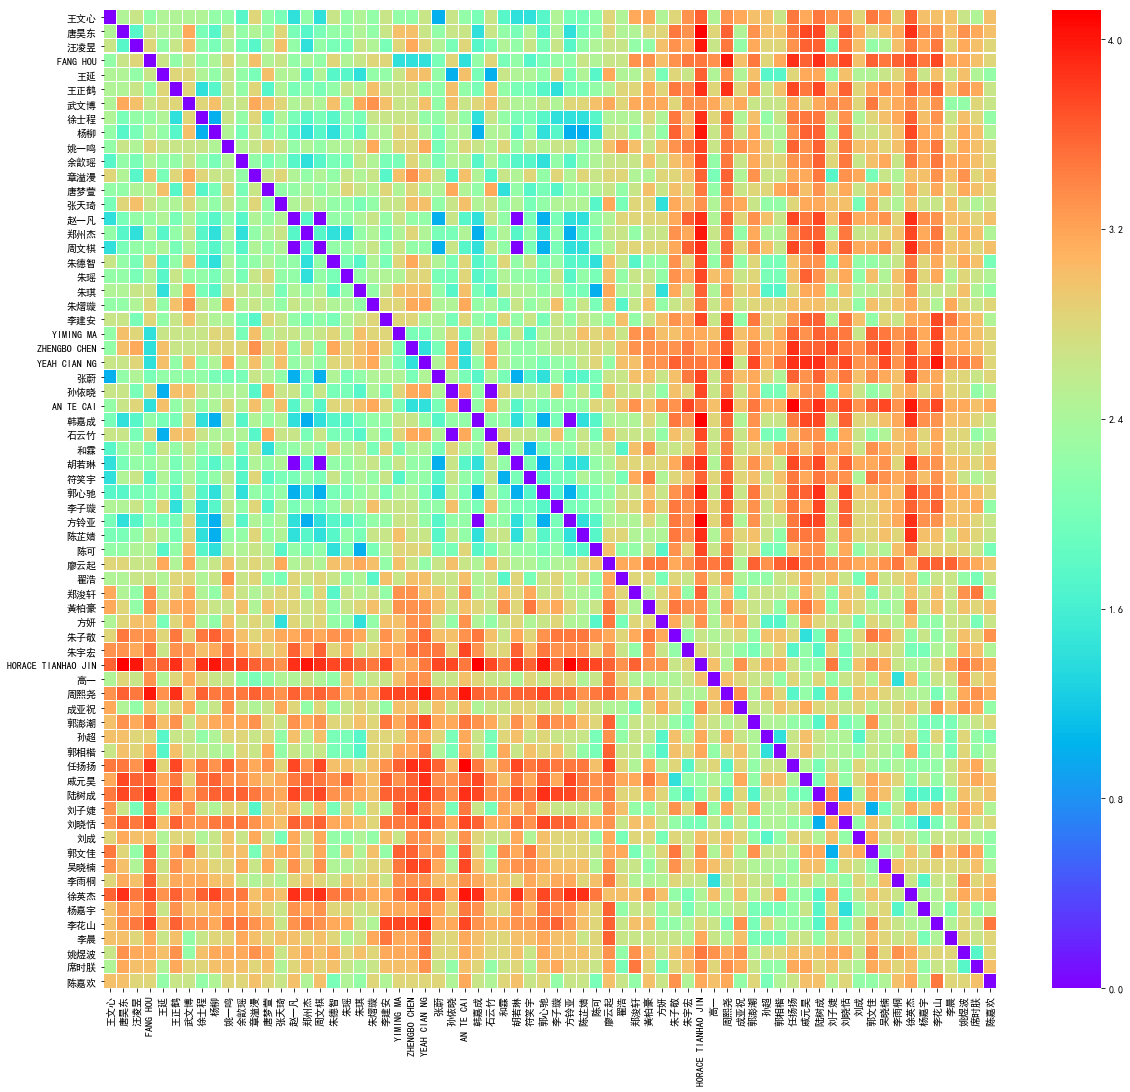

In [184]:
Curr_adj_2=Cluster(Curr_adj,2)
S2=HeatMap(Curr_adj_2[Curr_adjList])

## 聚3类

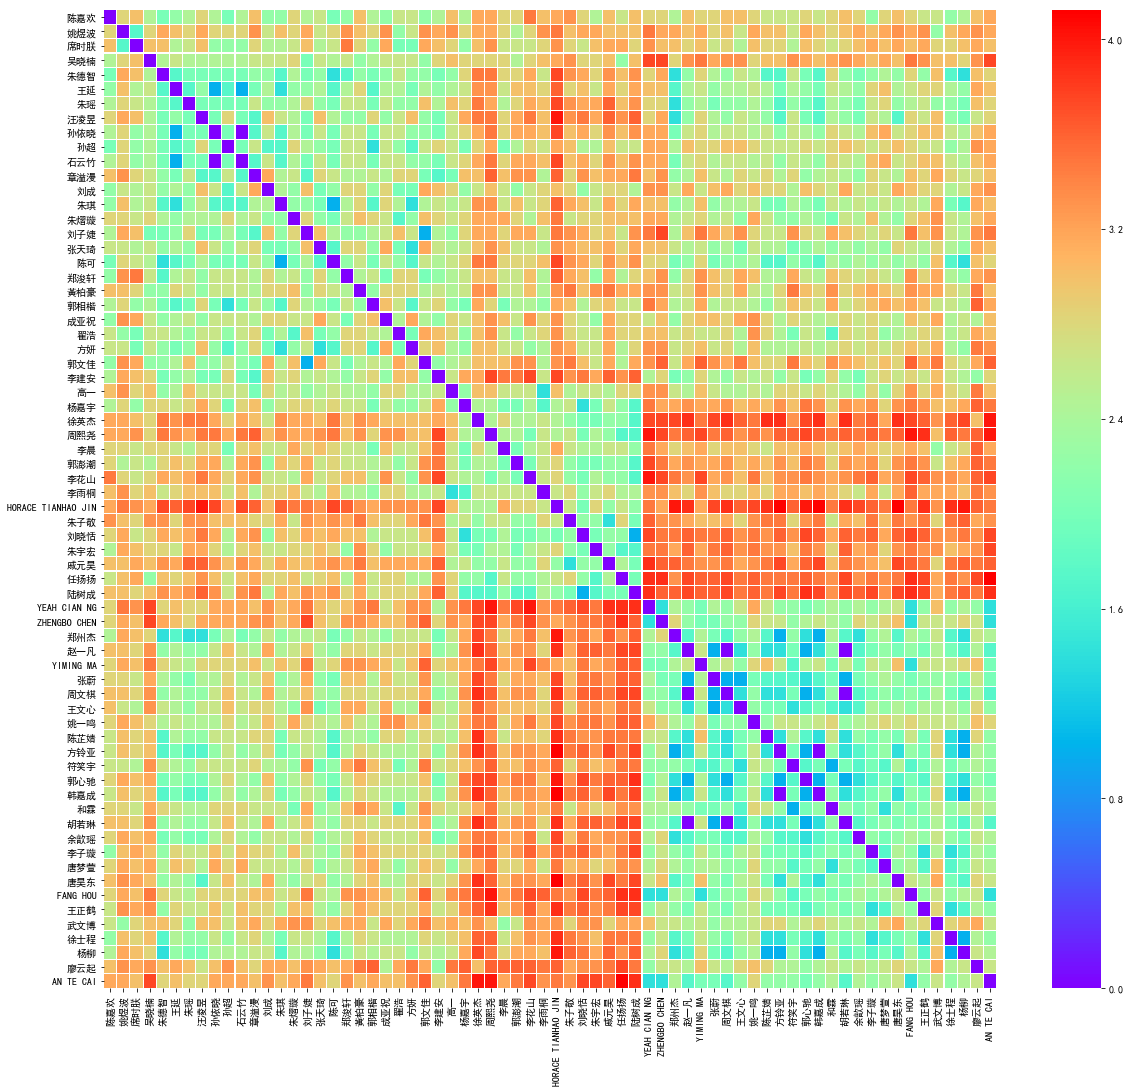

In [185]:
Curr_adj_3=Cluster(Curr_adj,3)
S3=HeatMap(Curr_adj_3[Curr_adjList])

## 聚4类

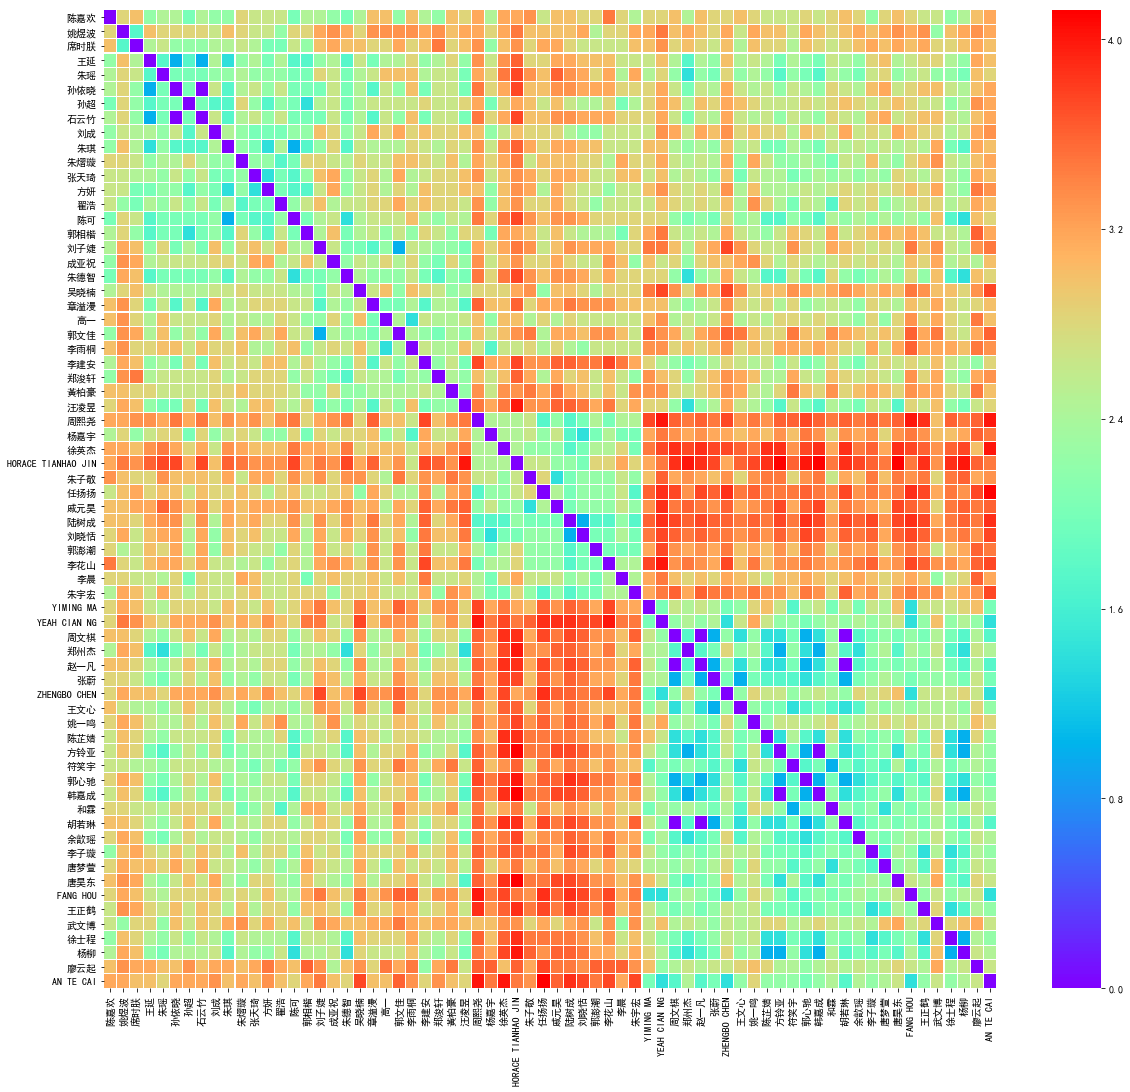

In [186]:
Curr_adj_4=Cluster(Curr_adj,4)
S4=HeatMap(Curr_adj_4[Curr_adjList])

# 最相似同学

In [187]:
Same_df__=S1.replace(0,99)
Same_df__.idxmin().to_frame('最相似')

,最相似
陈嘉欢,陈可
陈可,朱琪
陈芷婧,杨柳
成亚祝,郑浚轩
翟浩,和霖
方铃亚,郭心驰
方妍,张天琦
符笑宇,和霖
高一,李雨桐
郭澎潮,陆树成


# 聚3类-类别含义

In [188]:
Curr_adj_3_forBar=Curr_adj_3.groupby('type').mean().replace(1,np.nan).dropna(axis=1).T

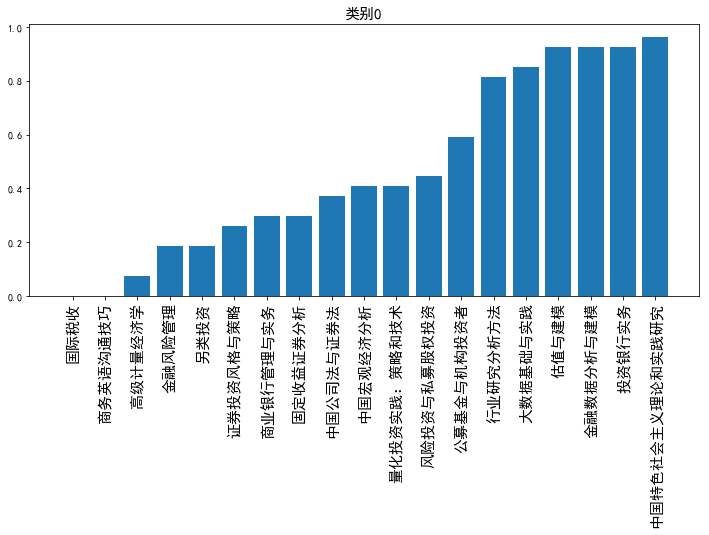

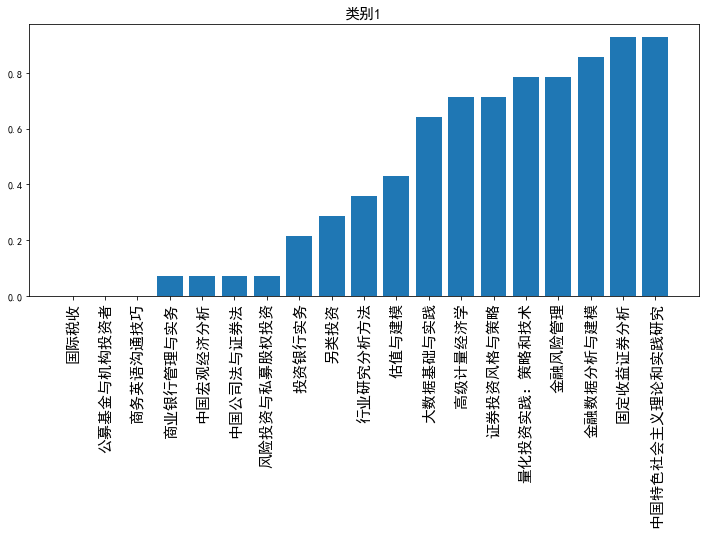

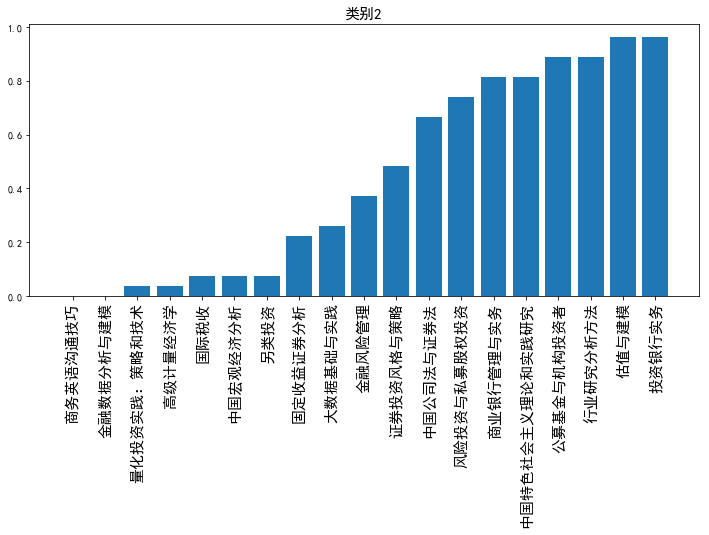

In [189]:
for col in Curr_adj_3_forBar.columns:
    series=Curr_adj_3_forBar[col].sort_values()
    f1=plt.figure(figsize=(12,5))
    ax1=f1.add_subplot(111)
    ax1.bar(series.index,series.values)
    plt.title('类别%d'%(col),fontsize=15)
    plt.xticks(rotation=90,fontsize=15)
    plt.show()

# 课程属性

In [194]:
CurrFeaDf=pd.get_dummies(Curr_adj_3,columns=['type']).rename(columns={'type_0':'中和','type_1':'量化','type_2':'行研'})

In [216]:
FeaList=['中和','行研','量化']
AllCurr=[col for col in Curr_adj_3_forBar.index if col not in ['中国特色社会主义理论和实践研究']]
CurrFeaDfV_all=pd.DataFrame()
for Fea in FeaList:
    CurrFeaDfV=CurrFeaDf[AllCurr].mul(CurrFeaDf[Fea],axis=0)
    CurrFeaDfV_all=pd.concat([CurrFeaDfV_all,CurrFeaDfV.sum().to_frame(Fea)],axis=1)

In [217]:
CurrFeaDfV_all.sort_values('行研',ascending=False)

,中和,行研,量化
投资银行实务,25,26,3
估值与建模,25,26,6
公募基金与机构投资者,16,24,0
行业研究分析方法,22,24,5
商业银行管理与实务,8,22,1
风险投资与私募股权投资,12,20,1
中国公司法与证券法,10,18,1
证券投资风格与策略,7,13,10
金融风险管理,5,10,11
大数据基础与实践,23,7,9
